# CREDIT CARD FRADULENT DETECTION

# IMPORT THE LIBRARIES

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [21]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [23]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# PERFORMING EDA

## CHECKING FOR NULL VALUES 

In [24]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# DATA VISUALIZATION

C:\Users\melvi\AppData\Local\Temp\ipykernel_9344\3697864109.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Amount"])


<Axes: xlabel='Amount', ylabel='Density'>

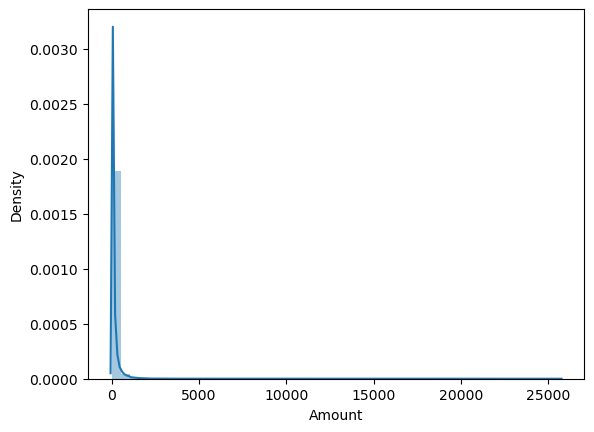

In [25]:
sns.distplot(df["Amount"])

<Axes: ylabel='Amount'>

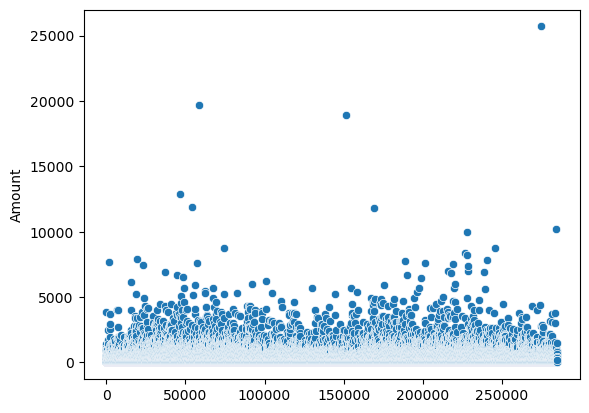

In [26]:
sns.scatterplot(df["Amount"])

C:\Users\melvi\AppData\Local\Temp\ipykernel_9344\3024223525.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Time"],color='green')


<Axes: xlabel='Time', ylabel='Density'>

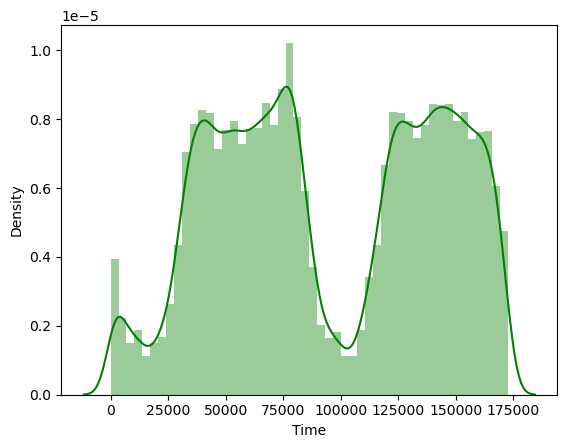

In [27]:
sns.distplot(df["Time"],color='green')

<Axes: ylabel='Class'>

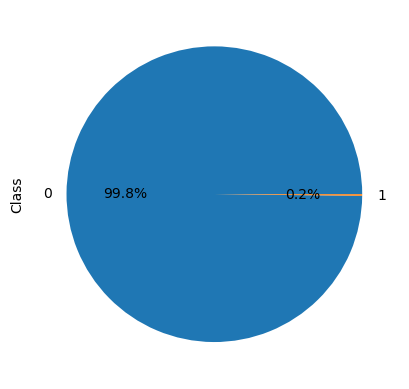

In [28]:
df["Class"].value_counts().plot(kind='pie',autopct='%1.1f%%')

# SPLITTING THE DATASET

In [29]:
x=df.drop("Class",axis=1)
y=df["Class"]

In [30]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [31]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

## DATA NORMALIZATION

In [32]:
from sklearn.preprocessing import StandardScaler
 
ss= StandardScaler()
 
x_scal=ss.fit_transform(x)
x_scal

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x_scal,y,test_size=0.2,random_state=2)

In [34]:
def report(x,y):
  print("Accuracy score : ",accuracy_score(x,y))
  print(confusion_matrix(x,y))
  print(classification_report(x,y))

# LOGISTIC REGRESSION

In [35]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [36]:
ypred_train_lr=lr.predict(x_train)
ypred_test_lr=lr.predict(x_test)

In [37]:
report(y_train,ypred_train_lr)
report(y_test,ypred_test_lr)

Accuracy score :  0.9991792666066843
[[227401     36]
 [   151    257]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227437
           1       0.88      0.63      0.73       408

    accuracy                           1.00    227845
   macro avg       0.94      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845

Accuracy score :  0.9994557775359011
[[56871     7]
 [   24    60]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.90      0.71      0.79        84

    accuracy                           1.00     56962
   macro avg       0.95      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962



# RANDOM FOREST

In [38]:
rfc=RandomForestClassifier(n_estimators=100,max_depth=5)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

In [39]:
ypred_train_rfc=rfc.predict(x_train)
ypred_test_rfc=rfc.predict(x_test)

In [40]:
report(y_train,ypred_train_rfc)
report(y_test,ypred_test_rfc)

Accuracy score :  0.9994996598564814
[[227426     11]
 [   103    305]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227437
           1       0.97      0.75      0.84       408

    accuracy                           1.00    227845
   macro avg       0.98      0.87      0.92    227845
weighted avg       1.00      1.00      1.00    227845

Accuracy score :  0.9995962220427653
[[56874     4]
 [   19    65]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.94      0.77      0.85        84

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



# XGBOOST

In [41]:
import xgboost as xgb

In [42]:
xgb=xgb.XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [43]:
ypred_train_xgb=xgb.predict(x_train)
ypred_test_xgb=xgb.predict(x_test)

In [44]:
report(y_train,ypred_train_xgb)
report(y_test,ypred_test_xgb)

Accuracy score :  1.0
[[227437      0]
 [     0    408]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227437
           1       1.00      1.00      1.00       408

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

Accuracy score :  0.9996313331694814
[[56873     5]
 [   16    68]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.93      0.81      0.87        84

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



# UPSAMPLING - SMOTE

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
sm=SMOTE()
x_sm,y_sm=sm.fit_resample(x_scal,y)


In [47]:
y_sm.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [48]:
x_sm_train,x_sm_test,y_sm_train,y_sm_test=train_test_split(x_sm,y_sm,test_size=0.2,random_state=2)

## LOGISTIC REGRESSION

In [49]:
lr.fit(x_sm_train,y_sm_train)

LogisticRegression()

In [50]:
ypred_trainsm_lr=lr.predict(x_sm_train)
ypred_testsm_lr=lr.predict(x_sm_test)

In [51]:
report(y_sm_train,ypred_trainsm_lr)
report(y_sm_test,ypred_testsm_lr)

Accuracy score :  0.9488111777429963
[[222270   5539]
 [ 17747 209348]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227809
           1       0.97      0.92      0.95    227095

    accuracy                           0.95    454904
   macro avg       0.95      0.95      0.95    454904
weighted avg       0.95      0.95      0.95    454904

Accuracy score :  0.9486836783145455
[[55078  1428]
 [ 4408 52812]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     56506
           1       0.97      0.92      0.95     57220

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



## RANDOM FOREST

In [52]:
rfc.fit(x_sm_train,y_sm_train)

RandomForestClassifier(max_depth=5)

In [53]:
ypred_trainsm_rfc=rfc.predict(x_sm_train)
ypred_testsm_rfc=rfc.predict(x_sm_test)

In [54]:
report(y_sm_train,ypred_trainsm_rfc)
report(y_sm_test,ypred_testsm_rfc)

Accuracy score :  0.9424779733746022
[[226963    846]
 [ 25321 201774]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95    227809
           1       1.00      0.89      0.94    227095

    accuracy                           0.94    454904
   macro avg       0.95      0.94      0.94    454904
weighted avg       0.95      0.94      0.94    454904

Accuracy score :  0.9418250883702936
[[56290   216]
 [ 6400 50820]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.94     56506
           1       1.00      0.89      0.94     57220

    accuracy                           0.94    113726
   macro avg       0.95      0.94      0.94    113726
weighted avg       0.95      0.94      0.94    113726



## XGBOOST

In [55]:
xgb.fit(x_sm_train,y_sm_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [56]:
ypred_trainsm_xgb=xgb.predict(x_sm_train)
ypred_testsm_xgb=xgb.predict(x_sm_test)

In [57]:
report(y_sm_train,ypred_trainsm_xgb)
report(y_sm_test,ypred_testsm_xgb)

Accuracy score :  0.9999868104039533
[[227803      6]
 [     0 227095]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227809
           1       1.00      1.00      1.00    227095

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904

Accuracy score :  0.9996306913106942
[[56464    42]
 [    0 57220]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56506
           1       1.00      1.00      1.00     57220

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



# DOWNSAMPLING 

In [58]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x_rs, y_rs =rus.fit_resample(x_scal, y)

In [59]:
y_rs.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [60]:
x_rs_train,x_rs_test,y_rs_train,y_rs_test=train_test_split(x_rs,y_rs,test_size=0.2,random_state=2)

## LOGISTIC REGRESSION

In [61]:
lr.fit(x_rs_train,y_rs_train)

LogisticRegression()

In [62]:
ypred_trainrs_lr=lr.predict(x_rs_train)
ypred_testrs_lr=lr.predict(x_rs_test)

In [63]:
report(y_rs_train,ypred_trainrs_lr)
report(y_rs_test,ypred_testrs_lr)

Accuracy score :  0.9593392630241423
[[393   4]
 [ 28 362]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       397
           1       0.99      0.93      0.96       390

    accuracy                           0.96       787
   macro avg       0.96      0.96      0.96       787
weighted avg       0.96      0.96      0.96       787

Accuracy score :  0.949238578680203
[[93  2]
 [ 8 94]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        95
           1       0.98      0.92      0.95       102

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



## RANDOM FOREST 

In [64]:
rfc.fit(x_rs_train,y_rs_train)

RandomForestClassifier(max_depth=5)

In [65]:
ypred_trainrs_rfc=rfc.predict(x_rs_train)
ypred_testrs_rfc=rfc.predict(x_rs_test)

In [66]:
report(y_rs_train,ypred_trainrs_rfc)
report(y_rs_test,ypred_testrs_rfc)

Accuracy score :  0.9593392630241423
[[397   0]
 [ 32 358]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       397
           1       1.00      0.92      0.96       390

    accuracy                           0.96       787
   macro avg       0.96      0.96      0.96       787
weighted avg       0.96      0.96      0.96       787

Accuracy score :  0.934010152284264
[[93  2]
 [11 91]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        95
           1       0.98      0.89      0.93       102

    accuracy                           0.93       197
   macro avg       0.94      0.94      0.93       197
weighted avg       0.94      0.93      0.93       197



## XGBOOST

In [67]:
xgb.fit(x_rs_train,y_rs_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [68]:
ypred_trainxgb_rfc=xgb.predict(x_rs_train)
ypred_testxgb_rfc=xgb.predict(x_rs_test)

In [69]:
report(y_rs_train,ypred_trainxgb_rfc)
report(y_rs_test,ypred_testxgb_rfc)

Accuracy score :  1.0
[[397   0]
 [  0 390]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       1.00      1.00      1.00       390

    accuracy                           1.00       787
   macro avg       1.00      1.00      1.00       787
weighted avg       1.00      1.00      1.00       787

Accuracy score :  0.949238578680203
[[93  2]
 [ 8 94]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        95
           1       0.98      0.92      0.95       102

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

